In [2]:
import pandas as pd 
from datetime import datetime
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
SPY_data = pd.read_csv("SPY_regression.csv")
 
# Change the Date column from object to datetime object 
SPY_data["Date"] = pd.to_datetime(SPY_data["Date"])
 
# Preview the data
SPY_data.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883
5,2015-11-30,2090.949951,2093.810059,2080.409912,2080.409912,4.245030e+09,2080.409912
6,2015-11-27,2088.820068,2093.290039,2084.129883,2090.110107,1.466840e+09,2090.110107
7,2015-11-25,2089.300049,2093.000000,2086.300049,2088.870117,2.852940e+09,2088.870117
8,2015-11-24,2084.419922,2094.120117,2070.290039,2089.139893,3.884930e+09,2089.139893
9,2015-11-23,2089.409912,2095.610107,2081.389893,2086.590088,3.587980e+09,2086.590088


In [4]:
# Set Date as index
SPY_data.set_index('Date',inplace=True)
 
# Reverse the order of the dataframe in order to have oldest values at top
SPY_data.sort_values('Date',ascending=True)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,3.991400e+09,1132.989990
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2.491020e+09,1136.520020
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4.972660e+09,1137.140015
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5.270680e+09,1141.689941
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,4.389590e+09,1144.979980
...,...,...,...,...,...,...
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117


In [5]:
SPY_data['High-Low_pct'] = (SPY_data['High'] - SPY_data['Low']).pct_change()
SPY_data['ewm_5'] = SPY_data["Close"].ewm(span=5).mean().shift(periods=1)
SPY_data['price_std_5'] = SPY_data["Close"].rolling(center=False,window= 30).std().shift(periods=1)
 
SPY_data['volume Change'] = SPY_data['Volume'].pct_change()
SPY_data['volume_avg_5'] = SPY_data["Volume"].rolling(center=False,window=5).mean().shift(periods=1)
SPY_data['volume Close'] = SPY_data["Volume"].rolling(center=False,window=5).std().shift(periods=1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

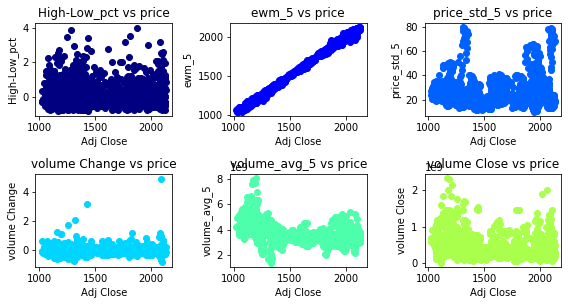

In [6]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))
 
def correlation(df,variables, n_rows, n_cols):
    fig = plt.figure(figsize=(8,6))
    #fig = plt.figure(figsize=(14,9))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df["Adj Close"], asset, c = next(colors))
        ax.set_xlabel("Adj Close")
        ax.set_ylabel("{}".format(var))
        ax.set_title(var +" vs price")
    fig.tight_layout() 
    plt.show()
        
# Take the name of the last 6 columns of the SPY_data which are the model features
variables = SPY_data.columns[-6:]  
 
correlation(SPY_data,variables,3,3)

In [7]:
SPY_data.corr()['Adj Close'].loc[variables]


High-Low_pct    -0.010328
ewm_5            0.998513
price_std_5      0.100524
volume Change   -0.005446
volume_avg_5    -0.485734
volume Close    -0.241898
Name: Adj Close, dtype: float64

In [8]:
SPY_data.isnull().sum().loc[variables]

High-Low_pct      1
ewm_5             1
price_std_5      30
volume Change     1
volume_avg_5      5
volume Close      5
dtype: int64

In [9]:
# To train the model is necessary to drop any missing value in the dataset.

SPY_data = SPY_data.dropna(axis=0)

# Generate the train and test sets

train = SPY_data[SPY_data.index < datetime(year=2015, month=1, day=1)]

test = SPY_data[SPY_data.index >= datetime(year=2015, month=1, day=1)]
dates = test.index

In [10]:
lr = LinearRegression()
 
X_train = train[["High-Low_pct","ewm_5","price_std_5","volume_avg_5","volume Change","volume Close"]]
 
Y_train = train["Adj Close"]
 
lr.fit(X_train,Y_train)      

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# Create the test features dataset (X_test) which will be used to make the predictions.

X_test = test[["High-Low_pct","ewm_5","price_std_5","volume_avg_5","volume Change","volume Close"]].values 

# The labels of the model

Y_test = test["Adj Close"].values 

In [12]:
close_predictions = lr.predict(X_test)   

mae = sum(abs(close_predictions - test["Adj Close"].values)) / test.shape[0]

print(mae)

18.09037765557185


C:\Users\sana.rasheed\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


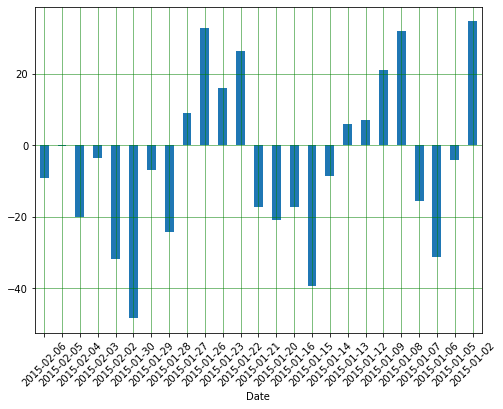

In [13]:
# Create a dataframe that output the Date, the Actual and the predicted values
df = pd.DataFrame({'Date':dates,'Actual': Y_test, 'Predicted': close_predictions})
df1 = df.tail(25)
 
# set the date with string format for plotting
df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')
 
df1.set_index('Date',inplace=True)
 
error = df1['Actual'] - df1['Predicted']
 
# Plot the error term between the actual and predicted values for the last 25 days
 
error.plot(kind='bar',figsize=(8,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()